In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    #"font.family": "Helvetica"
})

In [2]:
GF = 1.1663788e-5 #GeV-2
mZ = 91.1876 #GeV
mtau = 1.77686 #GeV
mmu = 105.6583755e-3 #GeV
me = 0.51099895e-3 #GeV
t = mtau**2/mZ**2
prefactor = 2**0.5/4*mZ**2*GF #(g/4cW)^2
hbarc = 0.1973269804e-9 # GeV μm
s2W = 0.22339 #\sin^2\theta_W at tree level (=1-mW^2/mZ^2)
s2Weff = 0.23122 #\sin^2\theta_W with 1-loop corrections
c2Weff = 1-s2Weff
c = 1-4*s2W

Lambda = 1000

In [3]:
l0 = 192*np.pi**3*hbarc/(mZ*prefactor)*Lambda**2/mtau**2

In [4]:
l0

0.11899505524504235

In [5]:
def Gamma_phi(mphi: float) -> float:
    res = 0
    if mphi > 2*me:
        res += mphi * me**2/(8*np.pi*Lambda**2)*np.sqrt(1-4*me**2/mphi**2)**3
    if mphi > 2*mmu:
        mphi * mmu**2/(8*np.pi*Lambda**2)*np.sqrt(1-4*mmu**2/mphi**2)**3
    if mphi > 2*mtau:
        mphi += mphi * mtau**2/(8*np.pi*Lambda**2)*np.sqrt(1-4*mtau**2/mphi**2)**3
    return res

In [6]:
list_mphi = [10**x for x in np.linspace(np.log10(2.01*me), 1, 50)]
listGamma = [hbarc/Gamma_phi(m) for m in list_mphi]

Text(0, 0.5, '$c_\\tau^2 d$ [nm]')

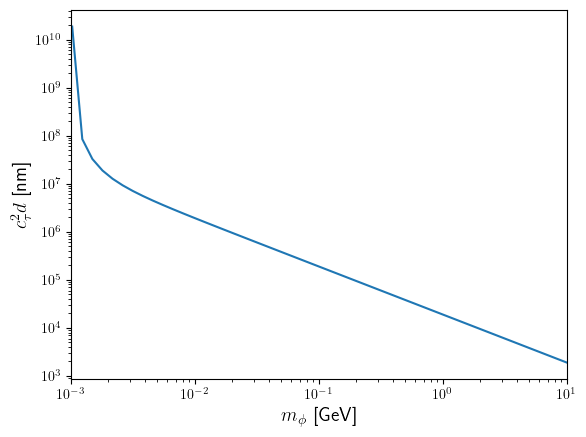

In [7]:
plt.loglog(list_mphi, listGamma)
#plt.ylim(0, 2e-6)
plt.xlim(1e-3, 10)
plt.xlabel(r'$m_\phi$ [GeV]', fontsize=14)
plt.ylabel(r"$c_\tau^2 d$ [nm]", fontsize=14)

\begin{equation}
\begin{split}
\frac{d \bar{\Gamma}}{dx_1 dx_2} &= \left(\frac{g}{4 c_w}\right)^2 \frac{m_\tau^2 \tilde{C}_\tau^2}{\Lambda^2} \frac{m_Z}{192 \pi^3} \\
& \qquad 
\left[\frac{1}{(1-x_1)(1-x_2)} \left( -2+4x_1+4x_2-8x_1x_2-x_1^2-x_2^2 +2x_1x_2^2+2x_1^2x_2 \right. \right. \\
& \left. \left. \qquad + c^2 (2-x_1-x_2)^2-2r^2(1-c^2)\right)+ 2 \varepsilon\frac{(-2+x_1+x_2)}{(1-x_1)^2(1-x_2^2)} \left[ -6+9x_1+9x_2-12x_1x_2\right. \right.\\
& \qquad \left. \left.-x_1^2-x_2^2+x_1^2x_2+x_1x_2^2 +  c^2 (8-6x_1-6x_2 + 4x_1x_2) + 8 \varepsilon_\tau (-2+c^2)\right]\right.\\
& \qquad \left.+ \frac{r}{(1-x_1)^2(1-x_2^2)} \left[ 4-8x_1-8x_2+16x_1x_2+3x_1^2+3x_2^2-6x_1^2x_2-6x_1x_2^2 + 2 x_1^2x_2^2\right. \right.\\
& \qquad  \left. \left. + \varepsilon (24-24x_1-24x_2+16x_1x_2+4x_1^2+4x_2^2) + c^2 \left( -6+8x_1+8x_2-8x_1x_2-3x_1^2-3x_2^2\right.\right.\right.\\
& \qquad \left. \left. \left. +2x_1^2x_2+2x_1x_2^2+ \varepsilon (-16+16x_1+16x_2-12x_1x_2-2x_1^2-2x_2^2) \right) \right] \right]
\end{split}
\end{equation}

In [8]:
def integrand(x2, x1, mphi):
    r = mphi**2/mZ**2
    eps = t
    return prefactor * mtau**2/Lambda**2 *mZ/(192*np.pi**3)*((-2+4*x1+4*x2-8*x1*x2-x1**2-x2**2+2*x1*x2**2+2*x1**2*x2+c**2*(2-x1-x2)**2-2*r**2*(1-c**2))/(1-x1)/(1-x2)+2*eps*(-2+x1+x2)/(1-x1)**2/(1-x2**2)*(-6+9*x1+9*x2-12*x1*x2-x1**2-x2**2+x1**2*x2+x1*x2**2+c**2*(8-6*x1-6*x2+4*x1*x2)+8*eps*(-2+c**2))+r/(1-x1)**2/(1-x2**2)*(4-8*x1-8*x2+16*x1*x2+3*x1**2+3*x2**2-6*x1**2*x2-6*x1*x2**2+2*x1**2*x2**2+eps*(24-24*x1-24*x2+16*x1*x2+4*x1**2+4*x2**2)+c**2*(-6+8*x1+8*x2-8*x1*x2-3*x1**2-3*x2**2+2*x1**2*x2+2*x1*x2**2+eps*(-16+16*x1+16*x2-12*x1*x2-2*x1**2-2*x2**2))))

\begin{equation}
\begin{split}
    x_2^{\text{max}} &= \frac{2 - 2 r - 3 x_1 + r x_1 + x_1^2 + 4 \varepsilon  - 2 x_1 \varepsilon  + 
   \sqrt{x_1^2 - 4 \varepsilon} \, \sqrt{
     1 - 2 r + r^2 - 2 x_1 + 2 r x_1 + x_1^2 - 4 r \varepsilon}}{2 (1 - x_1 + \varepsilon)}\\
    x_2^{\text{min}} &= \frac{2 - 2 r - 3 x_1 + r x_1 + x_1^2 + 4 \varepsilon  - 2 x_1 \varepsilon  - 
   \sqrt{x_1^2 - 4 \varepsilon} \, \sqrt{
     1 - 2 r + r^2 - 2 x_1 + 2 r x_1 + x_1^2 - 4 r \varepsilon}}{2 (1 - x_1 + \varepsilon)}
\end{split}
\end{equation}

In [9]:
def x2min(x1, mphi):
    r = mphi**2/mZ**2
    eps = t
    return (2-2*r-3*x1+r*x1+x1**2+4*eps-2*x1*eps-(x1**2-4*eps)**0.5*(1-2*r+r**2-2*x1+2*r*x1+x1**2-4*r*eps)**0.5)/2/(1-x1+eps)

In [10]:
def x2max(x1, mphi):
    r = mphi**2/mZ**2
    eps = t
    return (2-2*r-3*x1+r*x1+x1**2+4*eps-2*x1*eps+(x1**2-4*eps)**0.5*(1-2*r+r**2-2*x1+2*r*x1+x1**2-4*r*eps)**0.5)/2/(1-x1+eps)

In [11]:
def dGammadx1(x1, mphi):
    return quad(integrand, x2min(x1, mphi), x2max(x1, mphi), (x1, mphi))[0]

In [12]:
def Gamma(mphi: float) -> float:
    r = mphi**2/mZ**2
    eps = t
    x1min = 2*eps**0.5
    x1max = 1-r-2*eps**0.5*r**0.5
    return quad(lambda x1: dGammadx1(x1, mphi), x1min, x1max)[0]

\begin{equation}
\begin{split}
    x_1^{\text{max}} &= 1- r -2 \sqrt{\varepsilon} \, \sqrt{r} \\
    x_1^{\text{min}} &= 2 \sqrt{\varepsilon}
\end{split}
\end{equation}

In [13]:
def p_phi(x2, x1, mphi):
    Ephi = (0.5-x1-x2)*mZ
    return (Ephi**2-mphi**2)**0.5/mphi

def p_integrand(x2, x1, mphi):
    return p_phi(x2, x1, mphi)*integrand(x2, x1, mphi)

def p_dGammadx1(x1, mphi):
    return quad(p_integrand, x2min(x1, mphi), x2max(x1, mphi), (x1, mphi))[0]

def p_Gamma(mphi: float) -> float:
    r = mphi**2/mZ**2
    eps = t
    x1min = 2*eps**0.5
    x1max = 1-r-2*eps**0.5*r**0.5
    return quad(lambda x1: p_dGammadx1(x1, mphi), x1min, x1max)[0]

In [14]:
list_d = np.array([p_Gamma(m)/Gamma(m)*hbarc/Gamma_phi(m) for m in list_mphi])

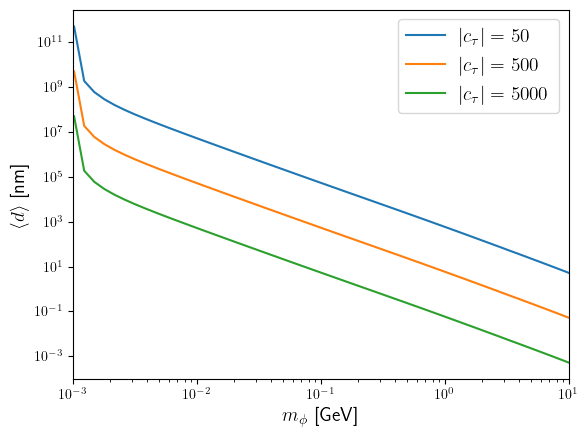

In [15]:
plt.loglog(list_mphi, list_d/50**2, label=r"$|c_\tau| = 50$")
plt.loglog(list_mphi, list_d/500**2, label=r"$|c_\tau| = 500$")
plt.loglog(list_mphi, list_d/5000**2, label=r"$|c_\tau| = 5000$")
plt.xlabel(r"$m_\phi$ [GeV]", fontsize=14)
plt.ylabel(r"$\langle d\rangle$ [nm]", fontsize=14)
plt.xlim(1e-3, 10)
plt.legend(fontsize=14)
plt.savefig("decaylength.png")

In [16]:
list_GammaZ = [Gamma(m) for m in list_mphi]

(0.001, 10)

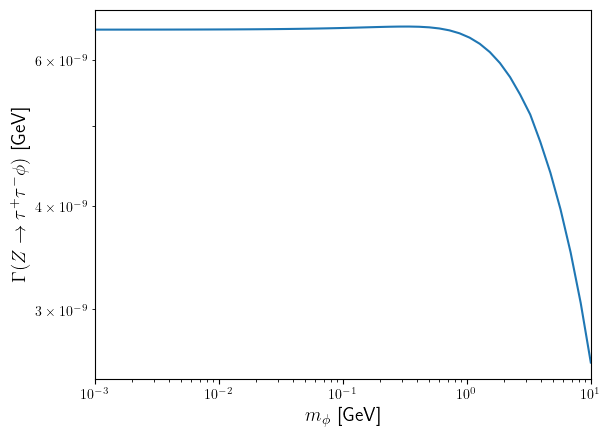

In [17]:
plt.loglog(list_mphi, list_GammaZ)
plt.xlabel(r"$m_\phi$ [GeV]", fontsize=14)
plt.ylabel(r"$\Gamma(Z\to\tau^+\tau^-\phi)$ [GeV]", fontsize=14)
plt.xlim(1e-3, 10)